# Header

### Import necessary libraries

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Build model
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim                 # Training strategy
from torch.utils.data import DataLoader     # Split data
import torchvision.datasets as datasets     # Load data
import torchvision.transforms as transforms # Data preprocessing

### Check whether we are using 'GPU' or 'CPU'

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### Setup for getting the reproducible results

In [3]:
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

### Hyperparameters for both models

In [4]:
random_seed = 1
n_epochs = 50
batch_size = 64
learning_rate = 0.001

- Optimizer: Adam
- Loss function: Cross Entropy
- Performance metric: Accuarcy

# **Fashion-MNIST  dataset**

## **Multi Layer Perceptron (MLP)**

### Load data

In [33]:
train_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/datasets/fashion_mnist', train=True, 
                               transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/datasets/fashion_mnist', train=False, 
                               transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

### Show an image example in training set

Ankle boot


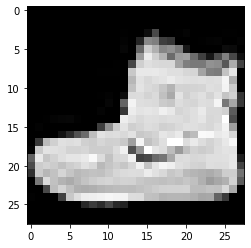

In [ ]:
image, label = train_dataset[0]
plt.imshow(image.squeeze(), cmap='gray')
print(train_dataset.classes[label])

### Build a MLP model using Pytorch

In [ ]:
#Hyperparameters
input_size = 1*28*28
n_classes = 10

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_size, n_classes):
    super().__init__()
    self.input_layer = nn.Linear(input_size, 100)
    self.hidden_layer_1 = nn.Linear(100, 100)
    self.hidden_layer_2 = nn.Linear(100, 50)
    self.hidden_layer_3 = nn.Linear(50, 25)
    self.output_layer = nn.Linear(25, n_classes)

  def forward(self, X):
    X = self.input_layer(X)
    X = F.relu(X)
    X = self.hidden_layer_1(X)
    X = F.relu(X)
    X = self.hidden_layer_2(X)
    X = F.relu(X)
    X = self.hidden_layer_3(X)
    X = F.relu(X)
    X = self.output_layer(X)
    prob = F.softmax(X, dim=1)
    return prob

In [ ]:
model = MLP(input_size=input_size,
            n_classes=n_classes).to(device)

In [ ]:
print(model)

MLP(
  (input_layer): Linear(in_features=784, out_features=100, bias=True)
  (hidden_layer_1): Linear(in_features=100, out_features=100, bias=True)
  (hidden_layer_2): Linear(in_features=100, out_features=50, bias=True)
  (hidden_layer_3): Linear(in_features=50, out_features=25, bias=True)
  (output_layer): Linear(in_features=25, out_features=10, bias=True)
)


### Define the loss and the optimization algorithm

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Training model

In [ ]:
for epoch in range(n_epochs): 
  for batch_idx, (data, targets) in enumerate(train_loader):
    # Get data to GPU 
    data = data.to(device)
    targets = targets.to(device)

    # Change to the correct tensor shape 
    data = data.reshape(data.shape[0], -1)

    # forward pass 
    scores = model(data) 
    loss = criterion(scores, targets)
    
    # backward pass 
    optimizer.zero_grad()
    loss.backward()
    
    # gradient descent 
    optimizer.step()
    
    if (batch_idx+1) % 100 == 0:
      print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}')

Epoch 1/50, Batch 100, Loss: 1.98
Epoch 1/50, Batch 200, Loss: 1.81
Epoch 1/50, Batch 300, Loss: 1.81
Epoch 1/50, Batch 400, Loss: 1.80
Epoch 1/50, Batch 500, Loss: 1.87
Epoch 1/50, Batch 600, Loss: 1.83
Epoch 1/50, Batch 700, Loss: 1.80
Epoch 1/50, Batch 800, Loss: 1.89
Epoch 1/50, Batch 900, Loss: 1.76
Epoch 2/50, Batch 100, Loss: 1.76
Epoch 2/50, Batch 200, Loss: 1.88
Epoch 2/50, Batch 300, Loss: 1.84
Epoch 2/50, Batch 400, Loss: 1.79
Epoch 2/50, Batch 500, Loss: 1.71
Epoch 2/50, Batch 600, Loss: 1.71
Epoch 2/50, Batch 700, Loss: 1.72
Epoch 2/50, Batch 800, Loss: 1.72
Epoch 2/50, Batch 900, Loss: 1.64
Epoch 3/50, Batch 100, Loss: 1.74
Epoch 3/50, Batch 200, Loss: 1.74
Epoch 3/50, Batch 300, Loss: 1.71
Epoch 3/50, Batch 400, Loss: 1.69
Epoch 3/50, Batch 500, Loss: 1.77
Epoch 3/50, Batch 600, Loss: 1.60
Epoch 3/50, Batch 700, Loss: 1.60
Epoch 3/50, Batch 800, Loss: 1.70
Epoch 3/50, Batch 900, Loss: 1.66
Epoch 4/50, Batch 100, Loss: 1.65
Epoch 4/50, Batch 200, Loss: 1.66
Epoch 4/50, Ba

### Performance Evaluation

In [ ]:
def get_accuracy(loader, model):
  if loader.dataset.train:
    print('Getting accuracy on training data.'); 
  else:
    print('Getting accuracy on testing data.')
  
  n_corrects = 0
  n_samples = 0
  model.eval()
  
  with torch.no_grad():
    for x, y in loader:
      x = x.to(device)
      y = y.to(device)
      x = x.reshape(x.shape[0], -1)
      
      # forward
      scores = model(x)
      _, y_pred = scores.max(1)
      n_corrects += (y_pred == y).sum()
      n_samples += y_pred.size(0)
      
    print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples) *100.0:.2f}')
  model.train()

In [ ]:
get_accuracy(train_loader, model)
get_accuracy(test_loader, model)

Getting accuracy on training data.
We got 52798/60000 correct. Accuracy = 88.00
Getting accuracy on testing data.
We got 8586/10000 correct. Accuracy = 85.86


## **Convolutional Neural Networks (LeNet-5)**

### Transformations

In [ ]:
transforms = transforms.Compose([transforms.Resize((32, 32)),
                                 transforms.ToTensor()])

### Load datadata

In [ ]:
train_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/datasets/fashion_mnist', train=True, 
                               transform=transforms, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/datasets/fashion_mnist', train=False, 
                               transform=transforms, download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

### Build LeNet-5 by using PyTorch

In [ ]:
class LeNet5(nn.Module):
  def __init__(self, n_classes):
    super(). __init__() 
    self.model = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
      nn.Tanh(),
      nn.AvgPool2d(kernel_size=2),
      nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
      nn.Tanh(),
      nn.AvgPool2d(kernel_size=2),
      nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
      nn.Tanh(),
      nn.Flatten(),
      nn.Linear(in_features=120, out_features=84),
      nn.Tanh(),
      nn.Linear(in_features=84, out_features=n_classes),
      nn.Softmax(dim=1)
    )
    
  def forward(self, X):
    prob = self.model(X)
    return prob

In [ ]:
model = LeNet5(n_classes=n_classes).to(device)

In [ ]:
print(model)

LeNet5(
  (model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Tanh()
    (11): Linear(in_features=84, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)


### Define the loss and the optimization algorithm

In [ ]:
# Loss function: Cross entropy
criterion = nn.CrossEntropyLoss()
# Optimizer: Adam
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Training model

In [ ]:
for epoch in range(n_epochs):
  for batch_idx, (data, targets) in enumerate(train_loader):
    # Get data to GPU 
    data = data.to(device)
    targets = targets.to(device)
    
    # We don't need to reshape the image to vector format 

    # forward pass
    scores = model(data)
    loss = criterion(scores, targets)

    # backward pass
    optimizer.zero_grad()
    loss.backward()

    # gradient descent 
    optimizer.step()

    if (batch_idx+1) % 100 == 0:
      print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}')

Epoch 1/50, Batch 100, Loss: 1.82
Epoch 1/50, Batch 200, Loss: 1.79
Epoch 1/50, Batch 300, Loss: 1.72
Epoch 1/50, Batch 400, Loss: 1.62
Epoch 1/50, Batch 500, Loss: 1.71
Epoch 1/50, Batch 600, Loss: 1.77
Epoch 1/50, Batch 700, Loss: 1.65
Epoch 1/50, Batch 800, Loss: 1.63
Epoch 1/50, Batch 900, Loss: 1.62
Epoch 2/50, Batch 100, Loss: 1.63
Epoch 2/50, Batch 200, Loss: 1.55
Epoch 2/50, Batch 300, Loss: 1.59
Epoch 2/50, Batch 400, Loss: 1.62
Epoch 2/50, Batch 500, Loss: 1.65
Epoch 2/50, Batch 600, Loss: 1.68
Epoch 2/50, Batch 700, Loss: 1.66
Epoch 2/50, Batch 800, Loss: 1.62
Epoch 2/50, Batch 900, Loss: 1.57
Epoch 3/50, Batch 100, Loss: 1.57
Epoch 3/50, Batch 200, Loss: 1.64
Epoch 3/50, Batch 300, Loss: 1.64
Epoch 3/50, Batch 400, Loss: 1.62
Epoch 3/50, Batch 500, Loss: 1.61
Epoch 3/50, Batch 600, Loss: 1.58
Epoch 3/50, Batch 700, Loss: 1.62
Epoch 3/50, Batch 800, Loss: 1.66
Epoch 3/50, Batch 900, Loss: 1.68
Epoch 4/50, Batch 100, Loss: 1.65
Epoch 4/50, Batch 200, Loss: 1.58
Epoch 4/50, Ba

### Performance Evaluation

In [ ]:
def get_accuracy(loader, model):
  if loader.dataset.train:
    print('Getting accuracy on training data.')
  else:
    print('Getting accuracy on testing data.')
  
  n_corrects = 0
  n_samples = 0
  model.eval()
  
  with torch.no_grad():
    for x, y in loader:
      x = x.to(device) 
      y = y.to(device) 
      
      # forward
      scores = model(x)
      _, y_pred = scores.max(1)
      n_corrects += (y_pred == y).sum()
      n_samples += y_pred.size(0)
    
    print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples) *100.0:.2f}') 
  model.train()

In [ ]:
get_accuracy(train_loader, model)
get_accuracy(test_loader, model)

Getting accuracy on training data.
We got 55760/60000 correct. Accuracy = 92.93
Getting accuracy on testing data.
We got 8865/10000 correct. Accuracy = 88.65


# **CIFAR-10 dataset**

## **Multi Layer Perceptron (MLP)**

### Load data

In [5]:
train_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/datasets/cifar10', train=True, 
                               transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/datasets/cifar10', train=False, 
                               transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


### Show an image example in training set

frog


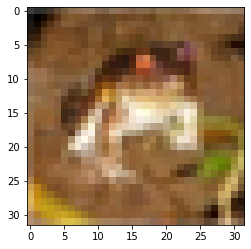

In [6]:
image, label = train_dataset[0]
plt.imshow(image.permute((1, 2, 0)))
print(train_dataset.classes[label])

### Build a MLP model using Pytorch

In [7]:
# Hyperparameters
input_size = 3*32*32
n_classes = 10

In [8]:
class MLP(nn.Module):
  def __init__(self, input_size, n_classes):
    super().__init__()
    self.input_layer = nn.Linear(input_size, 1024)
    self.hidden_layer_1 = nn.Linear(1024, 512)
    self.hidden_layer_2 = nn.Linear(512, 256)
    self.hidden_layer_3 = nn.Linear(256, 64)
    self.output_layer = nn.Linear(64, n_classes)

  def forward(self, X):
    X = self.input_layer(X)
    X = F.relu(X)
    X = self.hidden_layer_1(X)
    X = F.relu(X)
    X = self.hidden_layer_2(X)
    X = F.relu(X)
    X = self.hidden_layer_3(X)
    X = F.relu(X)
    X = self.output_layer(X)
    prob = F.softmax(X, dim=1)
    return prob

In [9]:
model = MLP(input_size=input_size,
            n_classes=n_classes).to(device)

In [10]:
print(model)

MLP(
  (input_layer): Linear(in_features=3072, out_features=1024, bias=True)
  (hidden_layer_1): Linear(in_features=1024, out_features=512, bias=True)
  (hidden_layer_2): Linear(in_features=512, out_features=256, bias=True)
  (hidden_layer_3): Linear(in_features=256, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=10, bias=True)
)


### Define the loss and the optimization algorithm

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Training model

In [17]:
for epoch in range(n_epochs): 
  for batch_idx, (data, targets) in enumerate(train_loader):
    # Get data to GPU
    data = data.to(device)
    targets = targets.to(device)
    
    # Reshape data to the correct tensor shape
    data = data.reshape(data.shape[0], -1)

    # forward pass 
    scores = model(data) 
    loss = criterion(scores, targets)
    
    # backward pass 
    optimizer.zero_grad()
    loss.backward()
    
    # gradient descent 
    optimizer.step()
    
    if (batch_idx+1) % 100 == 0:
      print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}')

Epoch 1/50, Batch 100, Loss: 2.22
Epoch 1/50, Batch 200, Loss: 2.08
Epoch 1/50, Batch 300, Loss: 1.98
Epoch 1/50, Batch 400, Loss: 2.12
Epoch 1/50, Batch 500, Loss: 2.13
Epoch 1/50, Batch 600, Loss: 2.08
Epoch 1/50, Batch 700, Loss: 2.07
Epoch 2/50, Batch 100, Loss: 2.01
Epoch 2/50, Batch 200, Loss: 2.14
Epoch 2/50, Batch 300, Loss: 2.17
Epoch 2/50, Batch 400, Loss: 2.05
Epoch 2/50, Batch 500, Loss: 2.10
Epoch 2/50, Batch 600, Loss: 1.95
Epoch 2/50, Batch 700, Loss: 2.11
Epoch 3/50, Batch 100, Loss: 2.14
Epoch 3/50, Batch 200, Loss: 2.14
Epoch 3/50, Batch 300, Loss: 2.16
Epoch 3/50, Batch 400, Loss: 2.15
Epoch 3/50, Batch 500, Loss: 2.00
Epoch 3/50, Batch 600, Loss: 2.05
Epoch 3/50, Batch 700, Loss: 2.10
Epoch 4/50, Batch 100, Loss: 2.07
Epoch 4/50, Batch 200, Loss: 2.07
Epoch 4/50, Batch 300, Loss: 2.05
Epoch 4/50, Batch 400, Loss: 2.04
Epoch 4/50, Batch 500, Loss: 1.98
Epoch 4/50, Batch 600, Loss: 2.08
Epoch 4/50, Batch 700, Loss: 2.11
Epoch 5/50, Batch 100, Loss: 2.02
Epoch 5/50, Ba

### Performance Evaluation

In [18]:
def get_accuracy(loader, model):
  if loader.dataset.train:
    print('Getting accuracy on training data.'); 
  else:
    print('Getting accuracy on testing data.')
  
  n_corrects = 0
  n_samples = 0
  model.eval()

  with torch.no_grad():
    for x, y in loader:
      x = x.to(device)
      y = y.to(device)
      x = x.reshape(x.shape[0], -1)
      
      # forward
      scores = model(x)
      _, y_pred = scores.max(1)
      n_corrects += (y_pred == y).sum()
      n_samples += y_pred.size(0)
      
    print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples) *100.0:.2f}')
  model.train()

In [19]:
get_accuracy(train_loader, model)
get_accuracy(test_loader, model)

Getting accuracy on training data.
We got 22375/50000 correct. Accuracy = 44.75
Getting accuracy on testing data.
We got 4278/10000 correct. Accuracy = 42.78


- Accuracy just over 50% because MLP model would not scale well of images of larger sizes as parameters will explode 

## **Convolutional Neural Networks (LeNet-5)**

### Load data

In [20]:
train_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/datasets/cifar10', train=True, 
                               transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/datasets/cifar10', train=False, 
                               transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


### Build LeNet-5 by using PyTorch

In [26]:
class LeNet5(nn.Module):
  def __init__(self, n_classes):
    super(). __init__() 
    self.model = nn.Sequential(
      nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1),
      nn.Tanh(),
      nn.AvgPool2d(kernel_size=2),
      nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
      nn.Tanh(),
      nn.AvgPool2d(kernel_size=2),
      nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
      nn.Tanh(),
      nn.Flatten(),
      nn.Linear(in_features=120, out_features=84),
      nn.Tanh(),
      nn.Linear(in_features=84, out_features=n_classes),
      nn.Softmax(dim=1)
    )
    
  def forward(self, X):
    prob = self.model(X)
    return prob

In [27]:
model = LeNet5(n_classes=n_classes).to(device)

In [28]:
print(model)

LeNet5(
  (model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Tanh()
    (11): Linear(in_features=84, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)


### Define the loss and the optimization algorithm

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Training model

In [30]:
for epoch in range(n_epochs):
  for batch_idx, (data, targets) in enumerate(train_loader): 
    # Get data to GPU 
    data = data.to(device)
    targets = targets.to(device)
    
    # forward pass 
    scores = model(data) 
    loss = criterion(scores, targets)
    
    # backward pass 
    optimizer.zero_grad()
    loss.backward()
    
    # gradient descent 
    optimizer.step()

    if (batch_idx+1) % 100 == 0:
      print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}')

Epoch 1/50, Batch 100, Loss: 2.25
Epoch 1/50, Batch 200, Loss: 2.16
Epoch 1/50, Batch 300, Loss: 2.18
Epoch 1/50, Batch 400, Loss: 2.11
Epoch 1/50, Batch 500, Loss: 2.13
Epoch 1/50, Batch 600, Loss: 2.08
Epoch 1/50, Batch 700, Loss: 2.01
Epoch 2/50, Batch 100, Loss: 2.09
Epoch 2/50, Batch 200, Loss: 2.12
Epoch 2/50, Batch 300, Loss: 1.95
Epoch 2/50, Batch 400, Loss: 2.08
Epoch 2/50, Batch 500, Loss: 2.06
Epoch 2/50, Batch 600, Loss: 2.01
Epoch 2/50, Batch 700, Loss: 1.95
Epoch 3/50, Batch 100, Loss: 1.97
Epoch 3/50, Batch 200, Loss: 2.08
Epoch 3/50, Batch 300, Loss: 2.08
Epoch 3/50, Batch 400, Loss: 2.02
Epoch 3/50, Batch 500, Loss: 2.01
Epoch 3/50, Batch 600, Loss: 2.01
Epoch 3/50, Batch 700, Loss: 2.12
Epoch 4/50, Batch 100, Loss: 2.07
Epoch 4/50, Batch 200, Loss: 2.05
Epoch 4/50, Batch 300, Loss: 1.97
Epoch 4/50, Batch 400, Loss: 2.09
Epoch 4/50, Batch 500, Loss: 2.01
Epoch 4/50, Batch 600, Loss: 1.97
Epoch 4/50, Batch 700, Loss: 2.08
Epoch 5/50, Batch 100, Loss: 1.99
Epoch 5/50, Ba

### Performance Evaluation

In [31]:
def get_accuracy(loader, model):
  if loader.dataset.train:
    print('Getting accuracy on training data.')
  else:
    print('Getting accuracy on testing data.')
  
  n_corrects = 0
  n_samples = 0
  model.eval()
  
  with torch.no_grad():
    for x, y in loader:
      x = x.to(device) 
      y = y.to(device) 
      
      # forward
      scores = model(x)
      _, y_pred = scores.max(1)
      n_corrects += (y_pred == y).sum()
      n_samples += y_pred.size(0)
    
    print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples) *100.0:.2f}') 
  model.train()

In [32]:
get_accuracy(train_loader, model)
get_accuracy(test_loader, model)

Getting accuracy on training data.
We got 36757/50000 correct. Accuracy = 73.51
Getting accuracy on testing data.
We got 5272/10000 correct. Accuracy = 52.72
